In [1]:
# sampling_rate
# 오디오의 아날로그 신호를 디지털(이산적) 신호로 변환하여 다루는 과정을 'sampling'이라고 함.
# sampling_rate는 sampling 과정에 있어 아날로그 신호를 단위시간 당 얼마나 촘촘하게 디지털 신호로 변환할 지에 대한 지표.
# 즉 (주로 1초 당)sampling 주기의 횟수를 의미한다.
# 단위는 헤르츠(Hz).
# 예를 들어 44.1kHz의 sampling_rate는, 1초의 오디오 아날로그 신호를 44100개의 Hz로 쪼개서 디지털 신호로 변환/저장했다는 뜻.


# bit_depth
# 오디오 아날로그 신호를 디지털 신호로 변환할 때, 채취된 하나의 진동(1Hz, data)를 몇 개의 bit로 표현할 것인지에 대한 지표.
# 만약 bit_depth가 16bit라면, 1Hz의 오디오 신호를 65,536개의 단계를 갖춘 다이내믹 레인지( = 깊이 = 진폭)로 변환 처리가능하다.
# 이론적으로 1bit 당 6dB 다이내믹 레인지를 담아낼 수 있고, 16bit라면 96dB, 24bit라면 144dB의 다이내믹 레인지를 담아낼 수 있다.


# file_length
# 오디오 파일의 지속 시간(즉 오디오의 길이를 의미)
# wav 파일의 지속시간은 (data 수 / samplling_rate)로 구할 수 있다.

In [3]:
import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt

import pylab
import os

In [4]:
samplerate, data = sio.wavfile.read('C:\\Users\\PARK SUNHWAN\\Desktop\\DS\\DF903\\DF903_data\\test\\bed\\0c40e715_nohash_0.wav')

In [5]:
times = np.arange(len(data))/float(samplerate)

In [6]:
samplerate
# 이 파일의 sampling_rate는 16000Hz

16000

In [7]:
len(data)
# 이 파일의 data(Hz) 수는 16000개

16000

In [11]:
len(data)/samplerate
# 이 파일의 file length(지속 시간)은 1초

1.0

In [12]:
data
# 이 파일의 bit_depth는 16bit
# 이 파일의 data가 가질 수 있는 값은 65,536(2**16)개

array([244, 300, 536, ..., 947, 934, 797], dtype=int16)

In [61]:
scaled_data = data/32768

In [64]:
scaled_data.min()

-1.0

In [93]:
abs(min(list(data)))

-32768

In [29]:
data.max()

32767

In [34]:
from sklearn.preprocessing import normalize

In [35]:
norm1 = data / np.linalg.norm(data)
norm2 = normalize(data[:,np.newaxis], axis=0).ravel()

In [38]:
norm1.min()

-0.029130671306105808

In [46]:
data_normed = data / data.max(axis=0)

In [48]:
data_normed.max()

1.0

In [21]:
print(data.shape)
# 16,000개의 1차원 data

(16000,)


In [22]:
print(data.max())
print(data.min())

32767
-32768


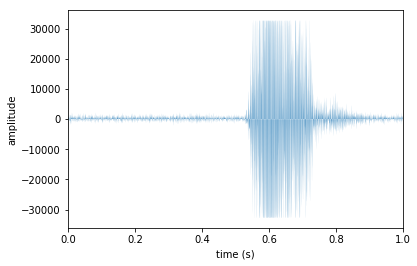

In [66]:
plt.fill_between(times, data)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

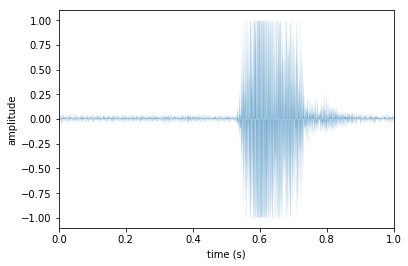

In [65]:
plt.fill_between(times, scaled_data)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

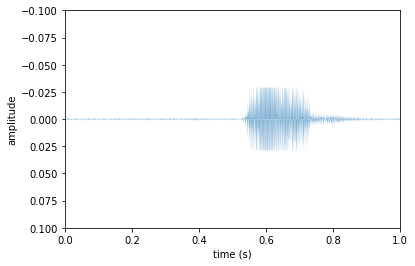

In [45]:
plt.fill_between(times, norm1)
plt.xlim(times[0], times[-1])
plt.ylim(0.1, -0.1)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [35]:
times[-1]

0.9999375